### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### waves_price

#### 1. Read the Data

In [2]:
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/waves_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,4.68,5.10,4.32,4.98,"6,194,560","467,862,000"
1,2017-09-04,5.20,5.21,4.24,4.66,"8,324,540","519,570,000"
2,2017-09-03,5.27,5.50,4.99,5.20,"5,174,780","526,827,000"
3,2017-09-02,5.78,5.87,5.07,5.23,"6,608,910","577,688,000"
4,2017-09-01,5.95,6.10,5.72,5.74,"9,556,080","595,498,000"


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [4]:
df.count()

Date          461
Open          461
High          461
Low           461
Close         461
Volume        461
Market Cap    461
dtype: int64

as we can see we have in this file 7 columns and each column has 461 cells

In [5]:
df.describe()

,Open,High,Low,Close
count,461.000000,461.000000,461.000000,461.000000
mean,1.230215,1.325607,1.139349,1.236654
std,1.736739,1.855163,1.612736,1.743821
min,0.127527,0.151516,0.122684,0.127242
25%,0.209567,0.218997,0.195051,0.209126
50%,0.263923,0.282579,0.245773,0.262370
75%,1.330000,1.600000,1.190000,1.370000
max,6.340000,7.010000,5.740000,6.340000


In [6]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 7 columns):
Date          461 non-null datetime64[ns]
Open          461 non-null float64
High          461 non-null float64
Low           461 non-null float64
Close         461 non-null float64
Volume        461 non-null object
Market Cap    461 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 25.3+ KB


In [7]:
#check if the dataset is duplicated
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
456    False
457    False
458    False
459    False
460    False
Length: 461, dtype: bool

as we can see the data fram has 7 columns. each column has 461 cells, and there is no missing data,but we hve to convert the dt type of the variables "Volume" and "Market Cap" to number


In [8]:
# Count missing data in each column
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

we can see there is no missing data 

### cleaning Data


In [9]:
print('Volume Data Type :', type(df.Volume[0]))
print('Market Cap Data Type :', type(df['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [10]:
# If Volume is equal to '-' convert it to 0
df.loc[df['Market Cap']=="-",'Market Cap']=0

In [11]:
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_number)
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',','')))

df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,461.000000,461.000000,461.000000,461.000000,4.610000e+02,4.610000e+02
mean,1.230215,1.325607,1.139349,1.236654,1.029869e+06,1.188037e+08
std,1.736739,1.855163,1.612736,1.743821,1.865055e+06,1.752829e+08
min,0.127527,0.151516,0.122684,0.127242,4.912000e+03,0.000000e+00
25%,0.209567,0.218997,0.195051,0.209126,5.223200e+04,1.995320e+07
50%,0.263923,0.282579,0.245773,0.262370,1.543750e+05,2.461440e+07
75%,1.330000,1.600000,1.190000,1.370000,1.225380e+06,1.214490e+08
max,6.340000,7.010000,5.740000,6.340000,1.012410e+07,6.344690e+08


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 7 columns):
Date          461 non-null datetime64[ns]
Open          461 non-null float64
High          461 non-null float64
Low           461 non-null float64
Close         461 non-null float64
Volume        461 non-null int64
Market Cap    461 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 25.3 KB


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 7 columns):
Date          461 non-null datetime64[ns]
Open          461 non-null float64
High          461 non-null float64
Low           461 non-null float64
Close         461 non-null float64
Volume        461 non-null int64
Market Cap    461 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 25.3 KB


In [17]:
# correlation between columns
correlation = df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.996043,0.996516,0.993847,0.868967,0.992636
High,0.996043,1.000000,0.995484,0.997224,0.878346,0.986898
Low,0.996516,0.995484,1.000000,0.997216,0.872368,0.991710
Close,0.993847,0.997224,0.997216,1.000000,0.877840,0.987635
Volume,0.868967,0.878346,0.872368,0.877840,1.000000,0.873010
Market Cap,0.992636,0.986898,0.991710,0.987635,0.873010,1.000000


let's plot data between Market Cap and other variable, then see the relation between the data


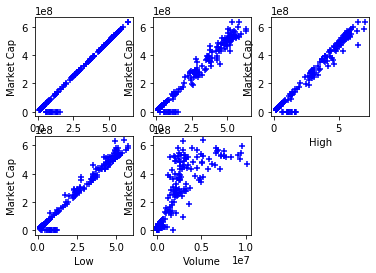

In [18]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(df.Open, df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(df.Close, df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(df.High, df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(df.Low, df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(df.Volume, df['Market Cap'],'Volume')

In [19]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = df[['Open']]
Market_Cap  = df['Market Cap']

In [20]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Model Score
model.score(Open, Market_Cap)

0.9853259018909114

#### 4. Data Visualization

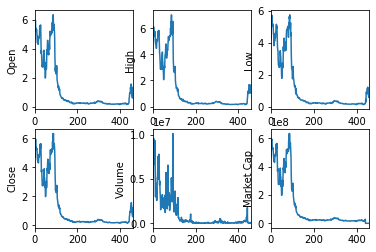

In [22]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df['Market Cap'].plot()